1.Normalizing all features

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('subset_mesh_features.csv')

global_features = ['area', 'volume', 'rectangularity', 'compactness', 'convexity', 'eccentricity', 'diameter']

histo_features = {
    'A3': [f'A3_bin_{i}' for i in range(30)],
    'D1': [f'D1_bin_{i}' for i in range(30)],
    'D2': [f'D2_bin_{i}' for i in range(30)],
    'D3': [f'D3_bin_{i}' for i in range(30)],
    'D4': [f'D4_bin_{i}' for i in range(30)]
}


In [11]:
# Standardization
for feature in global_features:
    mean = df[feature].mean()
    std = df[feature].std()
    df[feature] = (df[feature] - mean) / std  

# Normalization
for desc, bins in histo_features.items():
    total_counts = df[bins].sum(axis=1)
    df[bins] = df[bins].div(total_counts, axis=0).fillna(0)  

df.to_csv('normalized_subset_features.csv', index=False)


2. Weighting - trying multiple weigthing techniques- not sure if this is correct tbh

In [26]:
# # inverse-variance weighting
# # variance-based weights , so higher vairance features have lower weights and the opposite
# histo_variances = {hist: df[features].var().mean() for hist, features in histo_features.items()}
# # but with sq root so the effect is not as big
# total_variance = sum((1 / v) for v in histo_variances.values())
# histo_weights = {hist: (1 / v) / total_variance for hist, v in histo_variances.items()}


# # apply weights
# for hist, bins in histo_features.items():
#     df[bins] = df[bins] * histo_weights[hist]

df.to_csv('weighted_subset_features.csv', index=False)


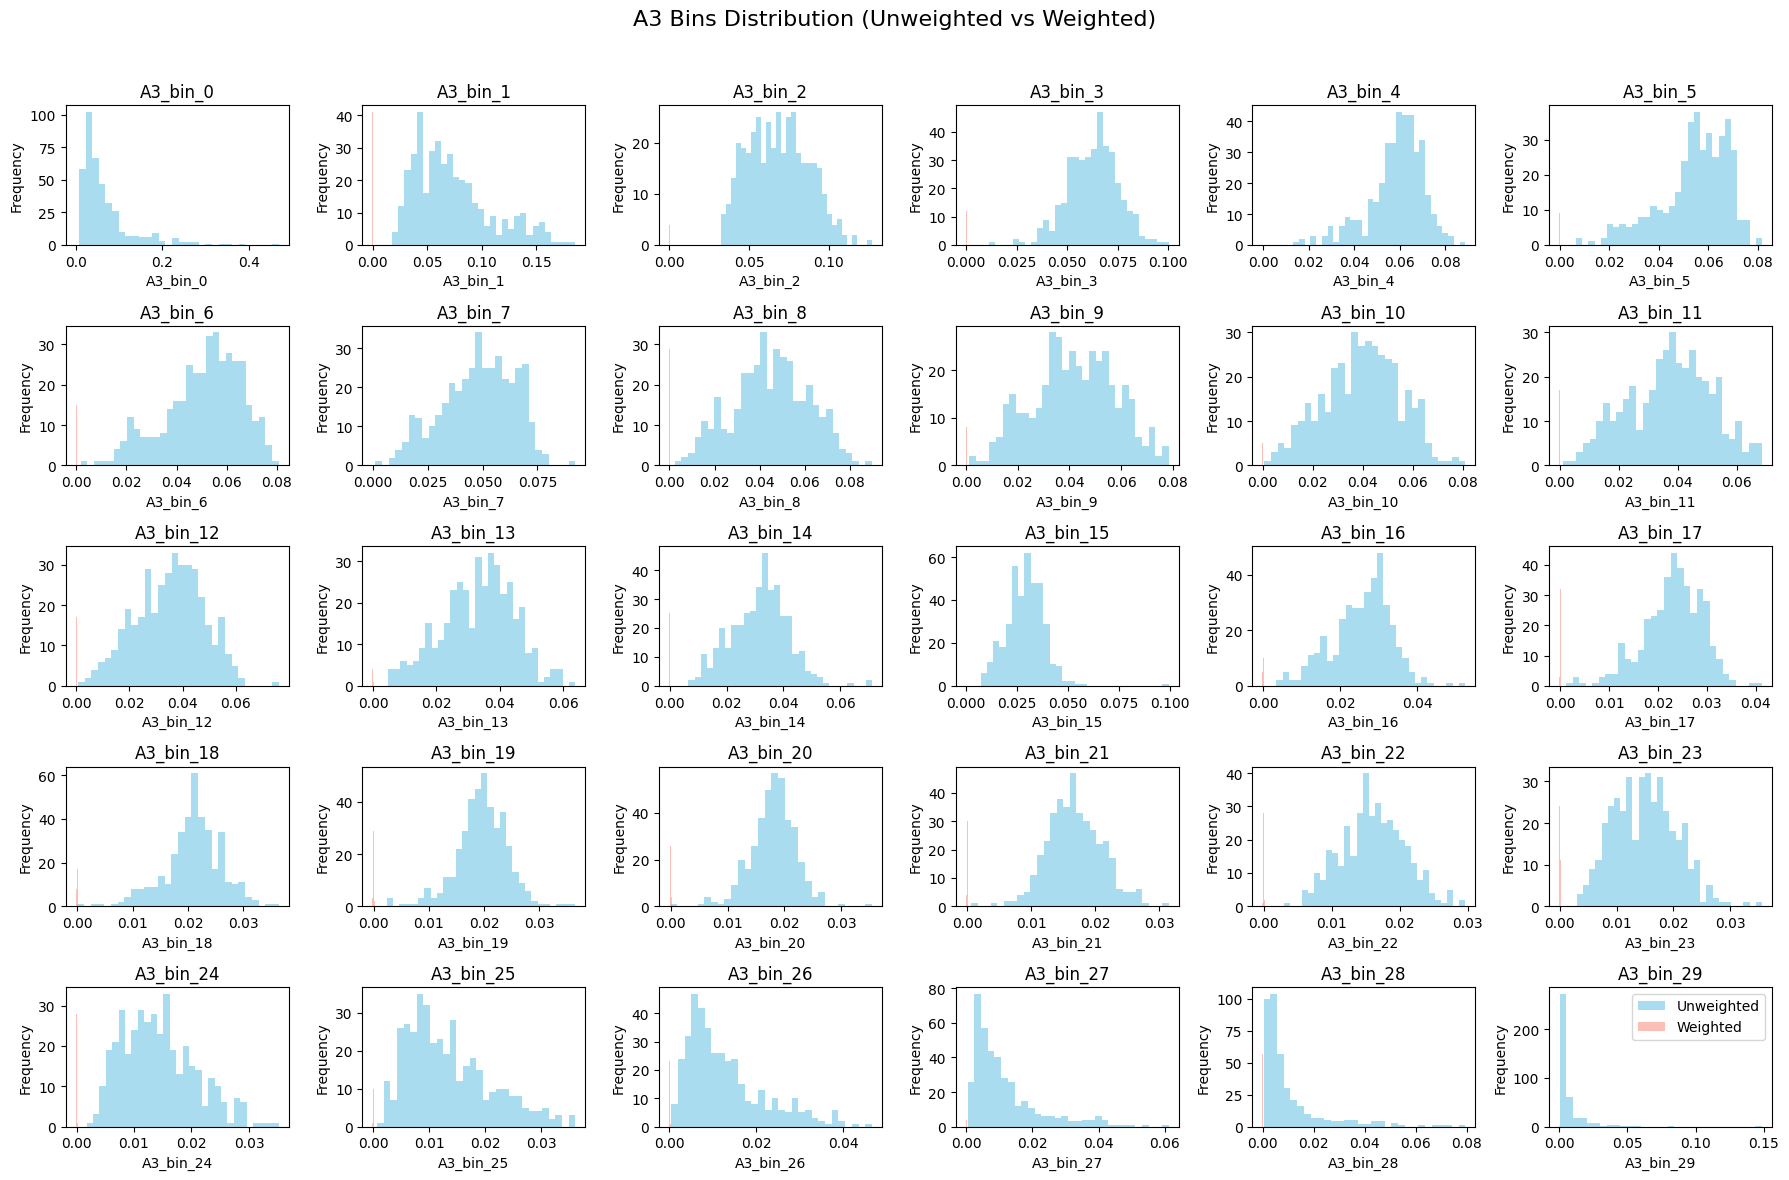

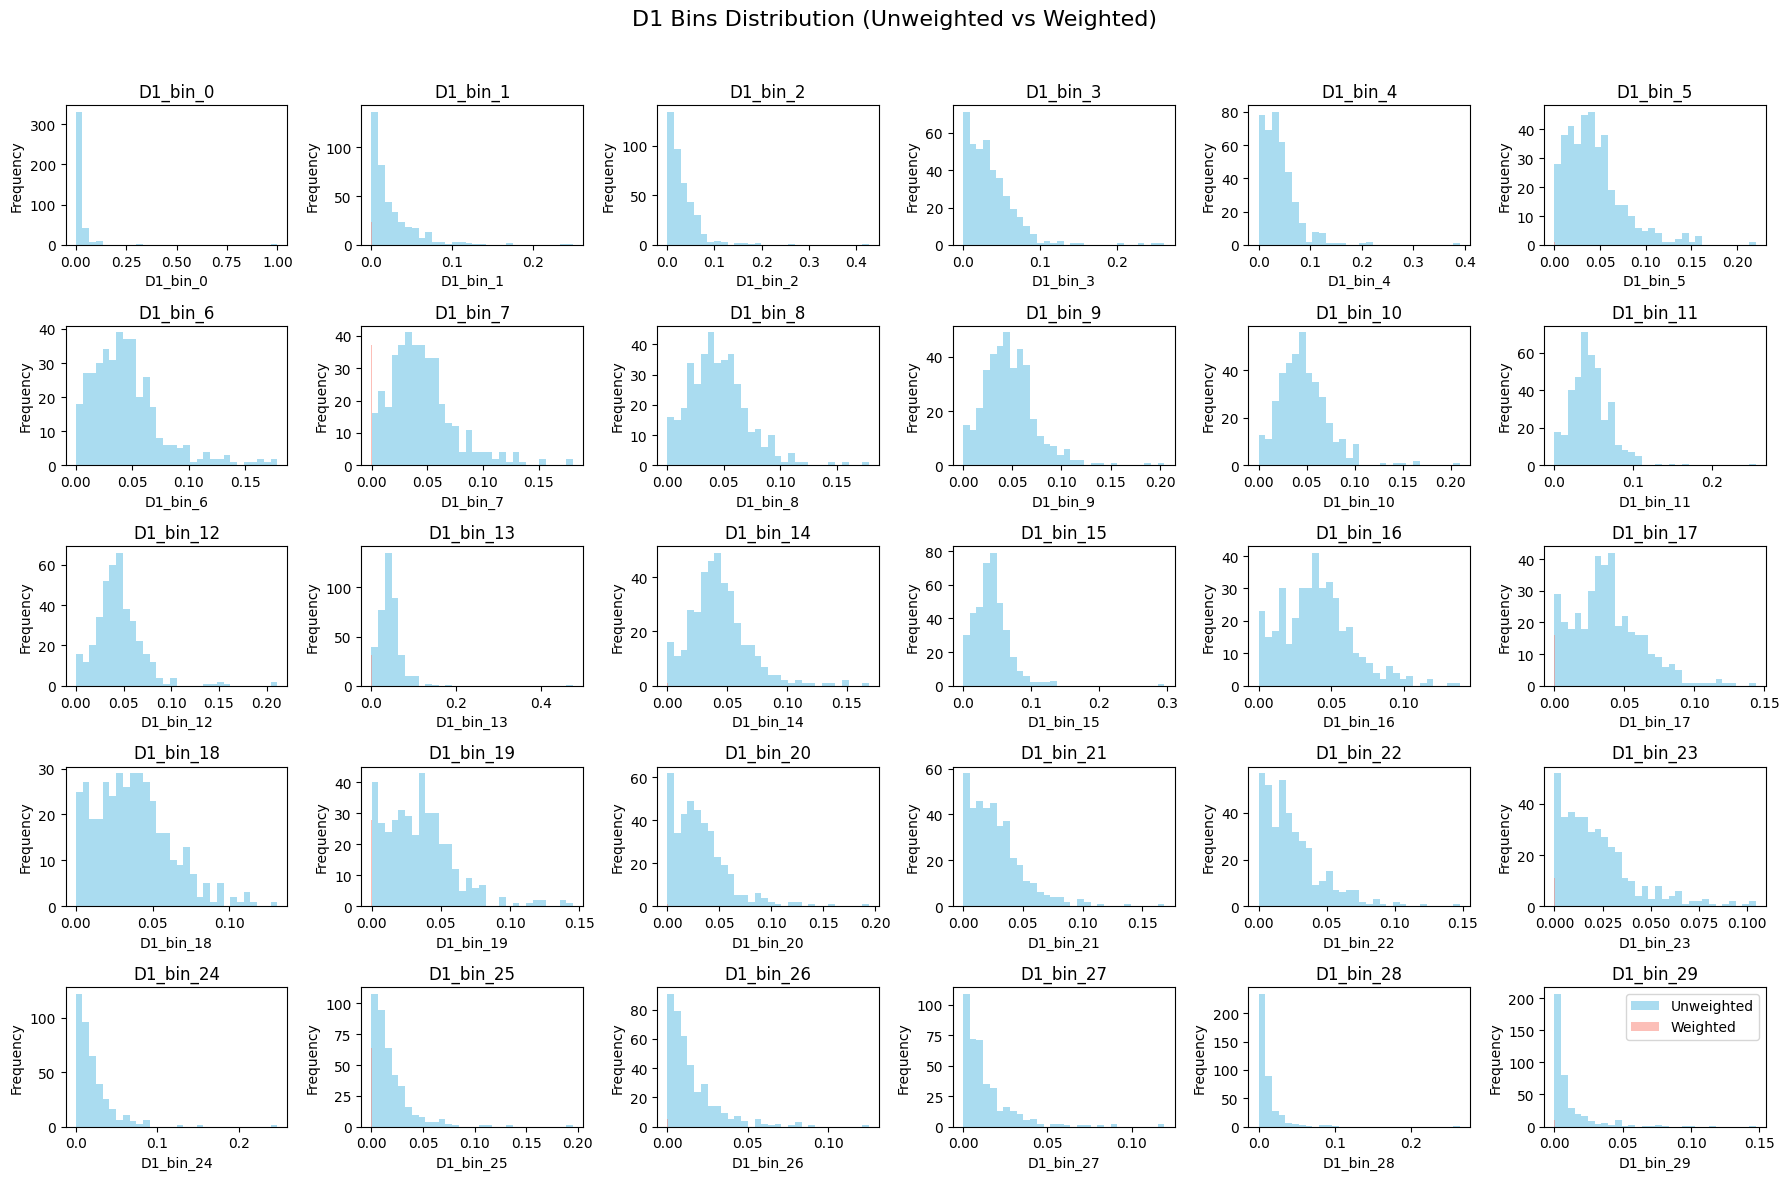

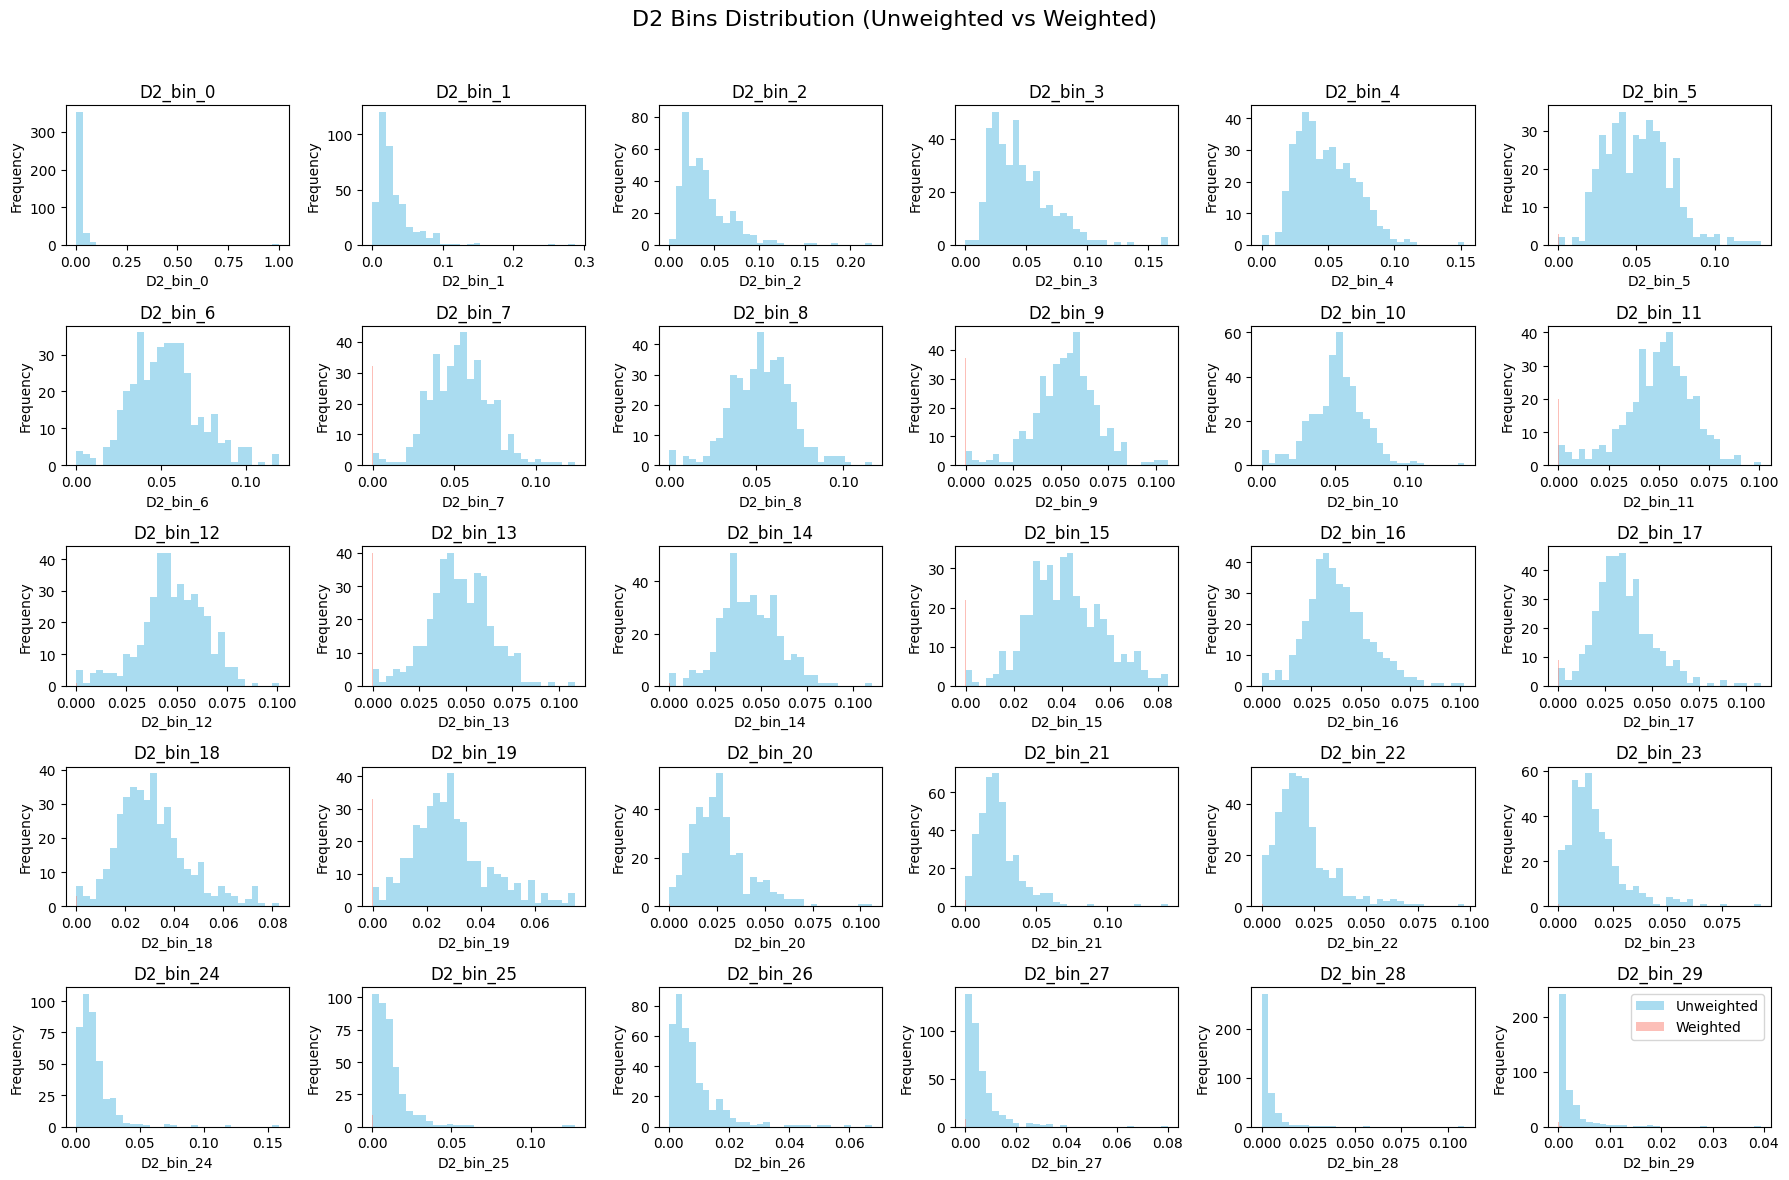

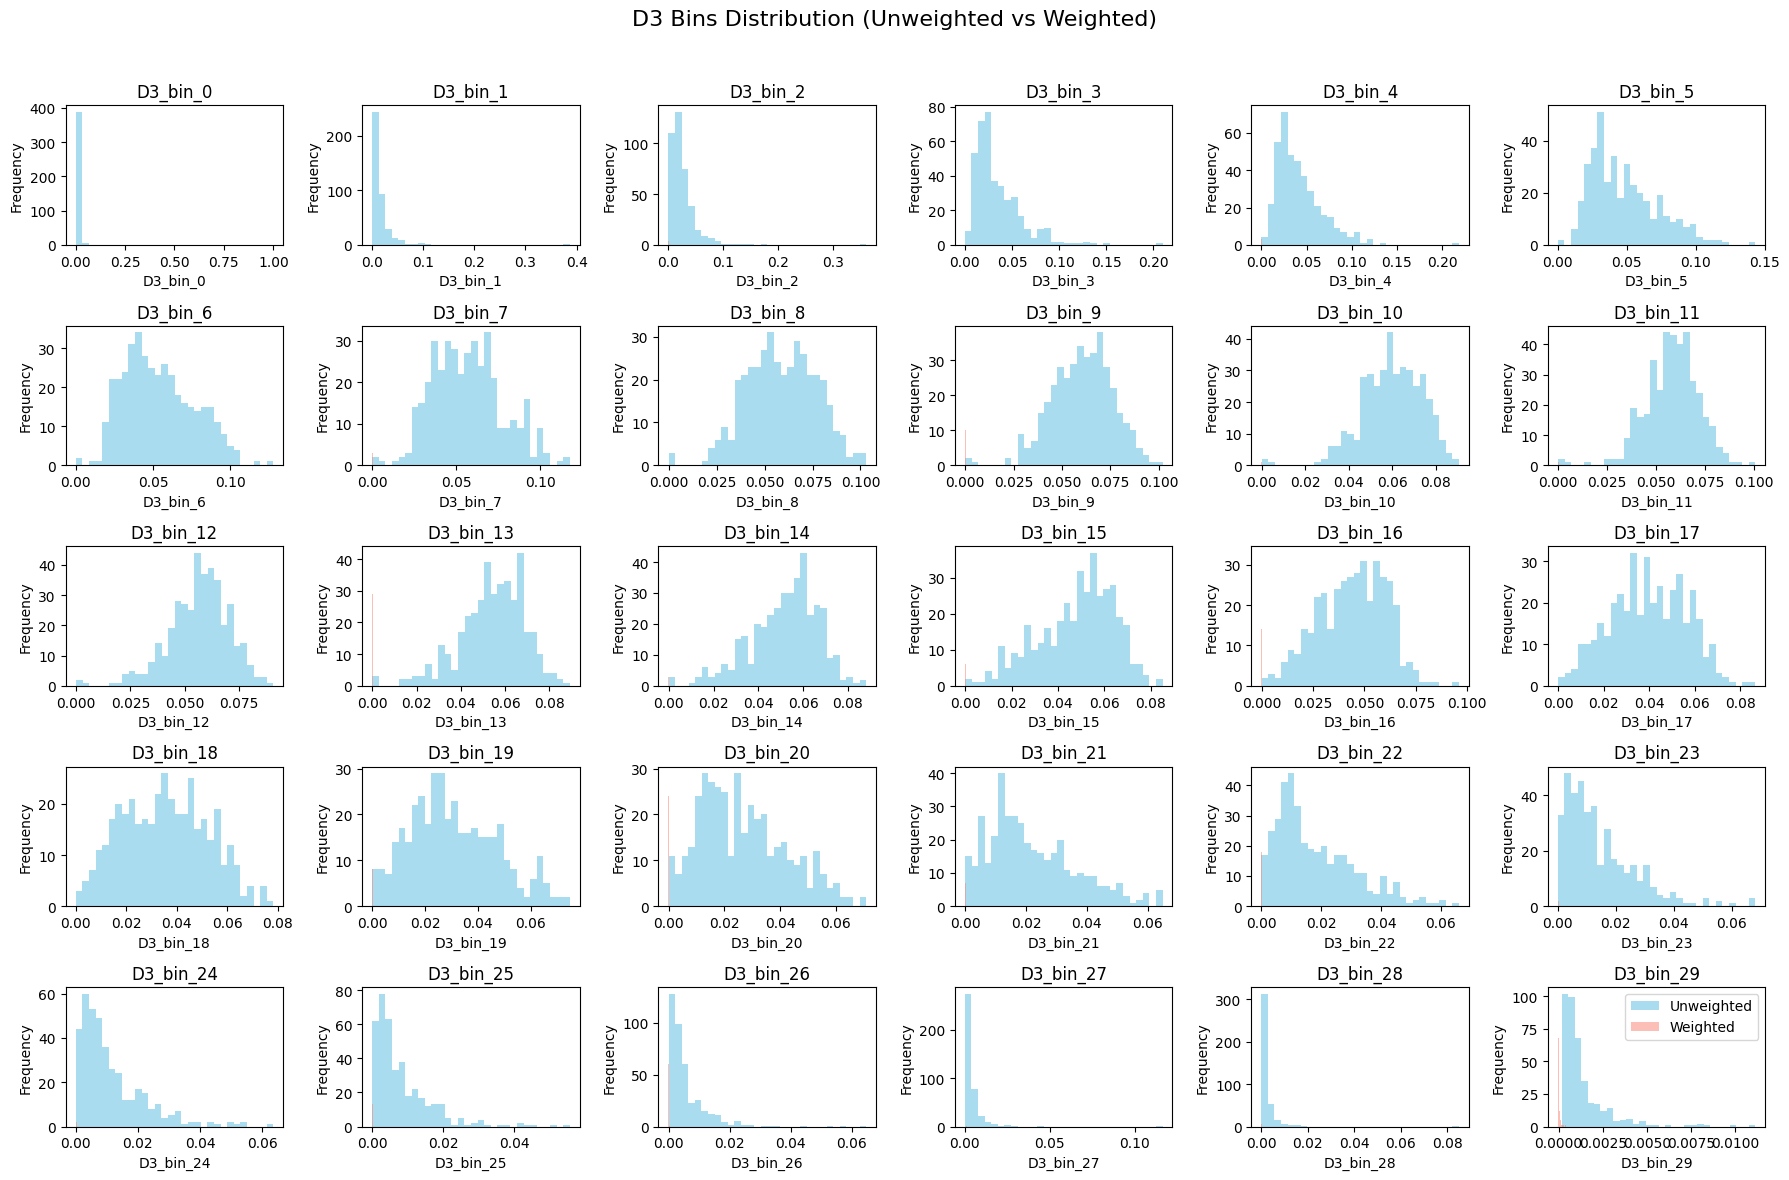

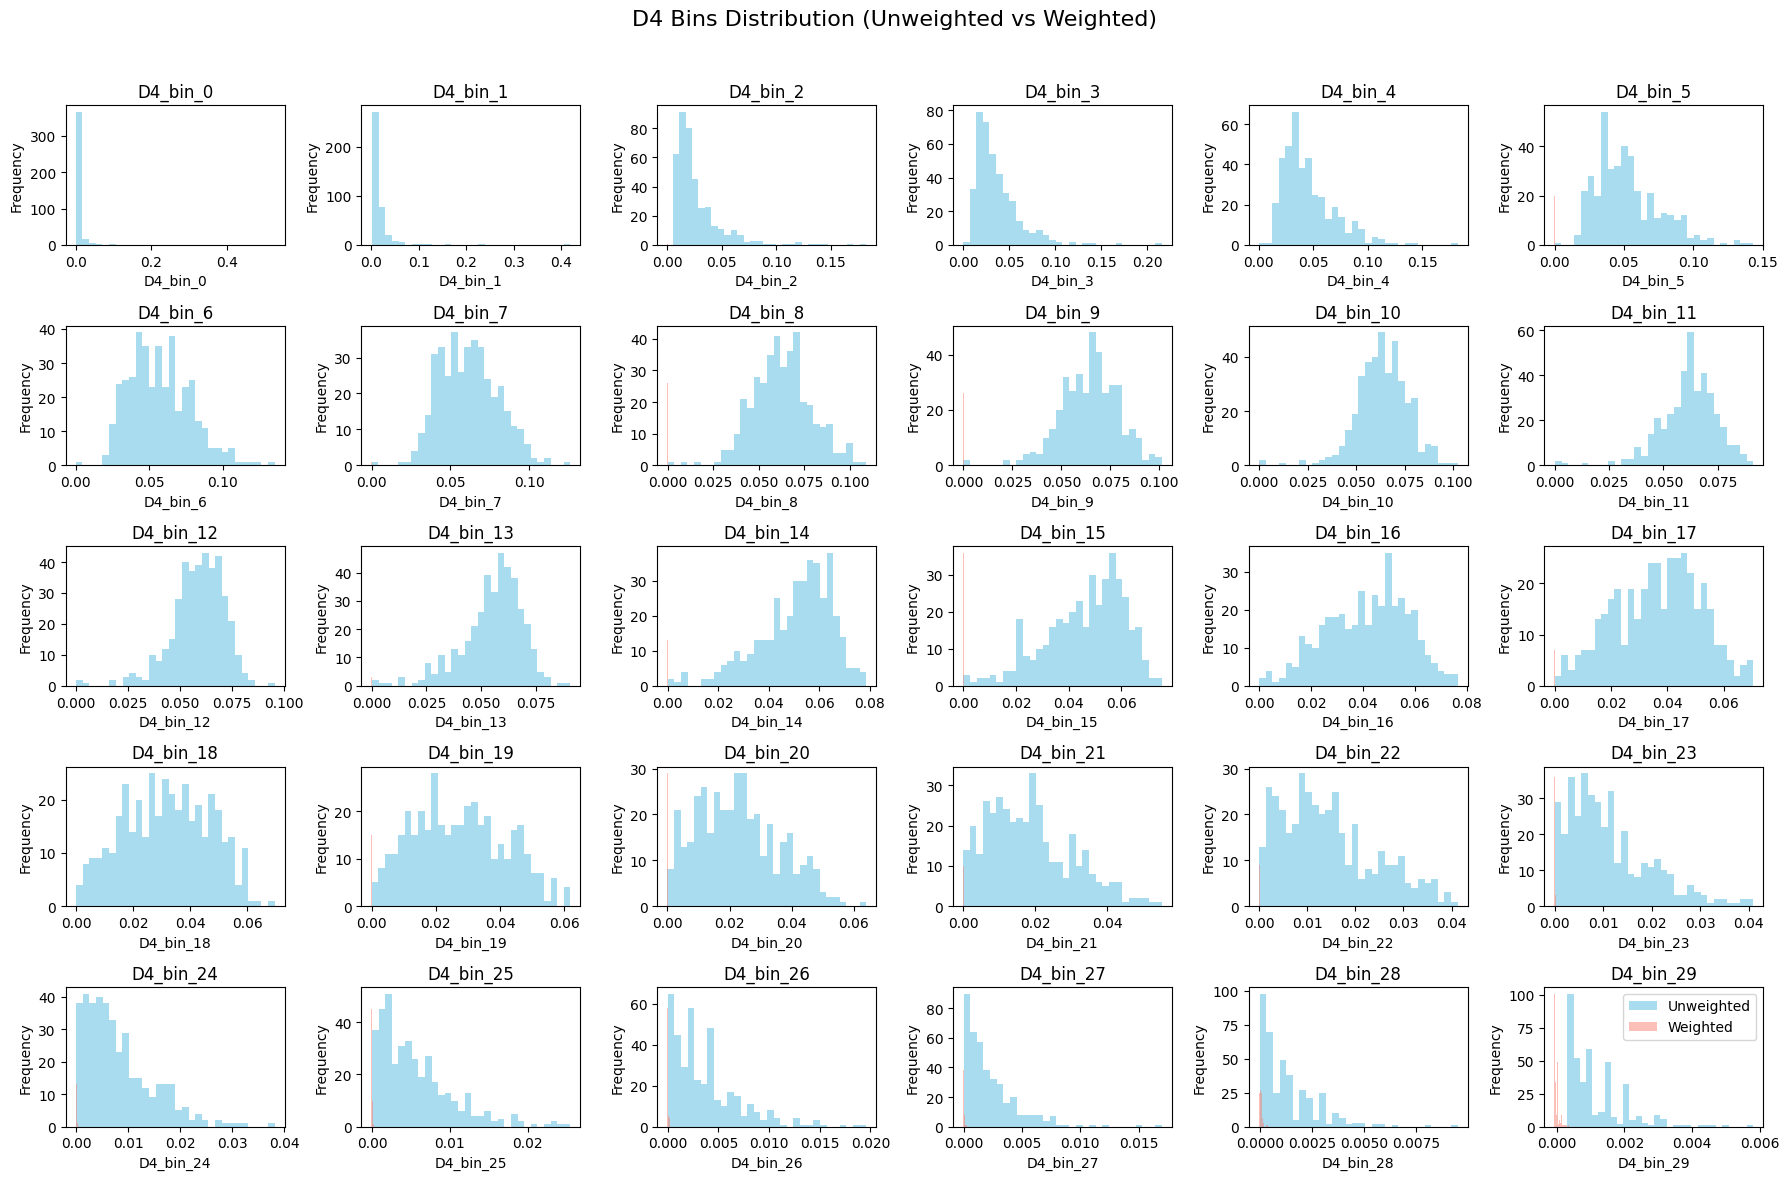

In [25]:
# data without weighting but already normalized
df_unweighted = pd.read_csv('normalized_subset_features.csv')

# weighted data
df_weighted = pd.read_csv('weighted_subset_features.csv')  

# Plotting to see weigthing effect: so here the weigthing should not have excessive distortion
for hist_name, bins in histo_features.items():
    fig, axes = plt.subplots(5, 6, figsize=(18, 12))
    fig.suptitle(f'{hist_name} Bins Distribution (Unweighted vs Weighted)', fontsize=16)

    for j, bin_name in enumerate(bins):
        row, col = divmod(j, 6)
        
        # Unweighted histo bin
        axes[row, col].hist(df_unweighted[bin_name], bins=30, color='skyblue', alpha=0.7, label='Unweighted')
        
        # Weighted histo bin
        axes[row, col].hist(df_weighted[bin_name], bins=30, color='salmon', alpha=0.5, label='Weighted')
        
        axes[row, col].set_title(bin_name)
        axes[row, col].set_xlabel(bin_name)
        axes[row, col].set_ylabel('Frequency')

    plt.legend(loc='upper right')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
